In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
link_df = pd.read_csv(Path('../../resources/prices/coin_ChainLink.csv'), index_col='SNo')
link_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Chainlink,LINK,2017-09-21 23:59:59,0.207892,0.155292,0.189132,0.169680,2.126270e+06,5.938800e+07
2,Chainlink,LINK,2017-09-22 23:59:59,0.181675,0.139869,0.169826,0.150503,1.423220e+06,5.267605e+07
3,Chainlink,LINK,2017-09-23 23:59:59,0.157440,0.126297,0.149562,0.131129,1.186670e+06,4.589515e+07
4,Chainlink,LINK,2017-09-24 23:59:59,0.190250,0.130275,0.131110,0.170278,1.025740e+06,5.959730e+07
5,Chainlink,LINK,2017-09-25 23:59:59,0.182637,0.158580,0.170636,0.182198,1.021370e+06,6.376930e+07
...,...,...,...,...,...,...,...,...,...
1252,Chainlink,LINK,2021-02-23 23:59:59,31.549831,21.198072,31.522873,25.800343,5.101236e+09,1.053969e+10
1253,Chainlink,LINK,2021-02-24 23:59:59,29.178788,24.645512,25.827651,28.086719,3.087990e+09,1.147369e+10
1254,Chainlink,LINK,2021-02-25 23:59:59,28.556830,24.595960,28.073373,24.668047,2.016769e+09,1.007713e+10


In [3]:
link_df['Date'] = pd.to_datetime(link_df['Date']).dt.date
link_df['Date'] = pd.to_datetime(link_df['Date'])
link_df['Spread'] = link_df.High - link_df.Low
link_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 1 to 1256
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1256 non-null   object        
 1   Symbol     1256 non-null   object        
 2   Date       1256 non-null   datetime64[ns]
 3   High       1256 non-null   float64       
 4   Low        1256 non-null   float64       
 5   Open       1256 non-null   float64       
 6   Close      1256 non-null   float64       
 7   Volume     1256 non-null   float64       
 8   Marketcap  1256 non-null   float64       
 9   Spread     1256 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 107.9+ KB


## Plot the closing value of Chainlink over time

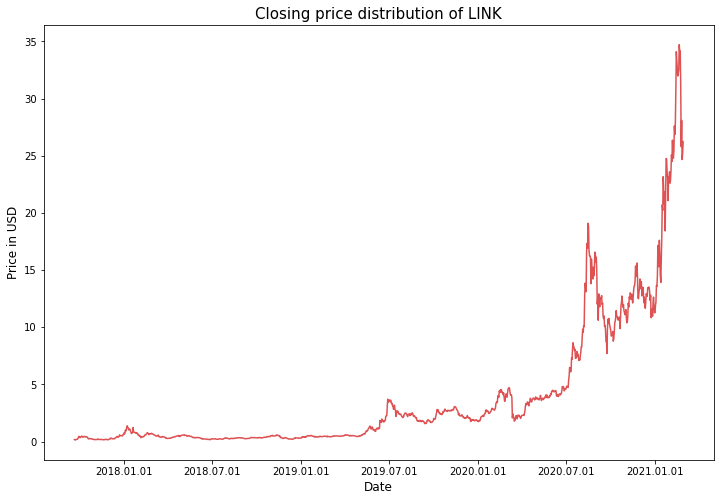

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = link_df.Close.values, x=link_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = link_df.Close.values, x=link_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of LINK", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

link_df['Date_mpl'] = link_df['Date'].apply(lambda x: mdates.date2num(x))

temp_link_df = link_df.copy(deep=False)
temp_link_df = temp_link_df.set_index(['Date'])
temp_link_df = temp_link_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_link_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-09-21,0.207892,0.155292,0.189132,0.169680,2.126270e+06,17430.0
2017-09-22,0.181675,0.139869,0.169826,0.150503,1.423220e+06,17431.0
2017-09-23,0.157440,0.126297,0.149562,0.131129,1.186670e+06,17432.0
2017-09-24,0.190250,0.130275,0.131110,0.170278,1.025740e+06,17433.0
2017-09-25,0.182637,0.158580,0.170636,0.182198,1.021370e+06,17434.0
...,...,...,...,...,...,...
2021-02-23,31.549831,21.198072,31.522873,25.800343,5.101236e+09,18681.0
2021-02-24,29.178788,24.645512,25.827651,28.086719,3.087990e+09,18682.0
2021-02-25,28.556830,24.595960,28.073373,24.668047,2.016769e+09,18683.0


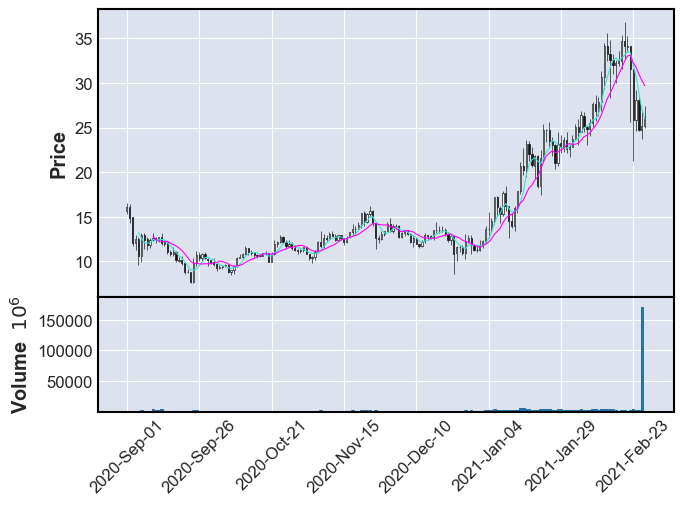

In [6]:
mpf.plot(temp_link_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_ChainLink.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,32.970471,30.302124,35.390896
183,2021-03-03 23:59:59,33.303772,30.880141,35.841326
184,2021-03-04 23:59:59,33.336819,30.815078,36.037532
185,2021-03-05 23:59:59,34.077450,31.619762,36.631517
186,2021-03-06 23:59:59,34.628393,32.046220,37.251537


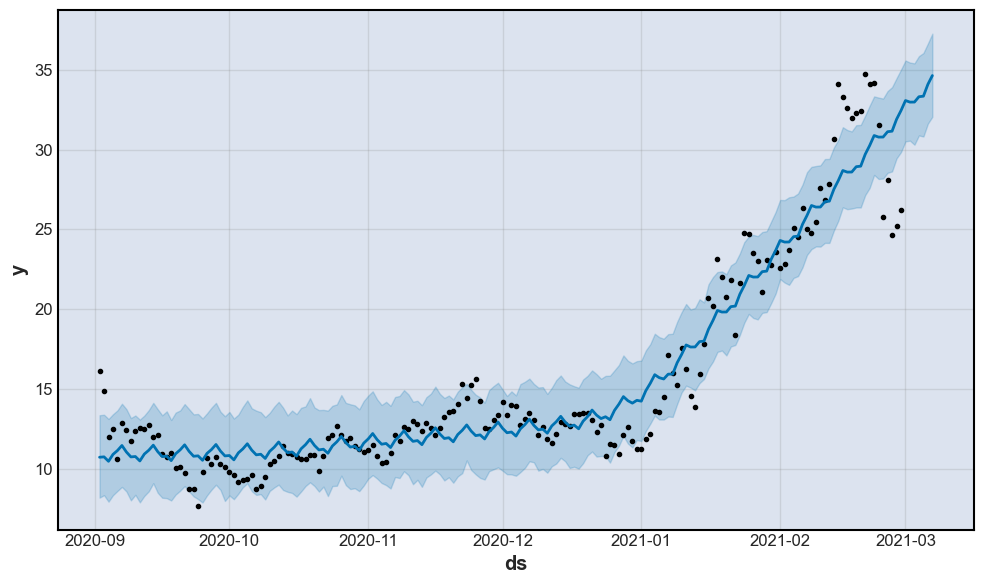

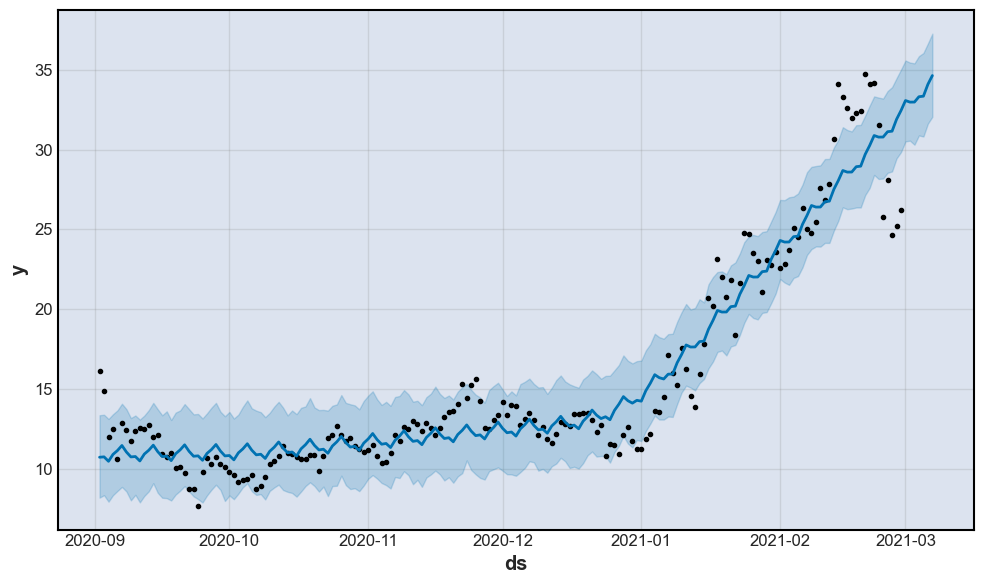

In [9]:
m.plot(forecast)

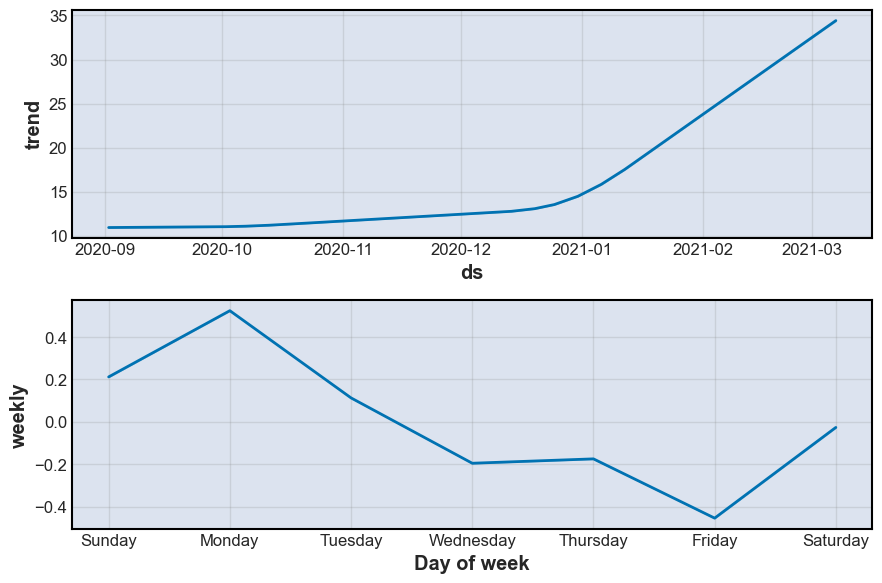

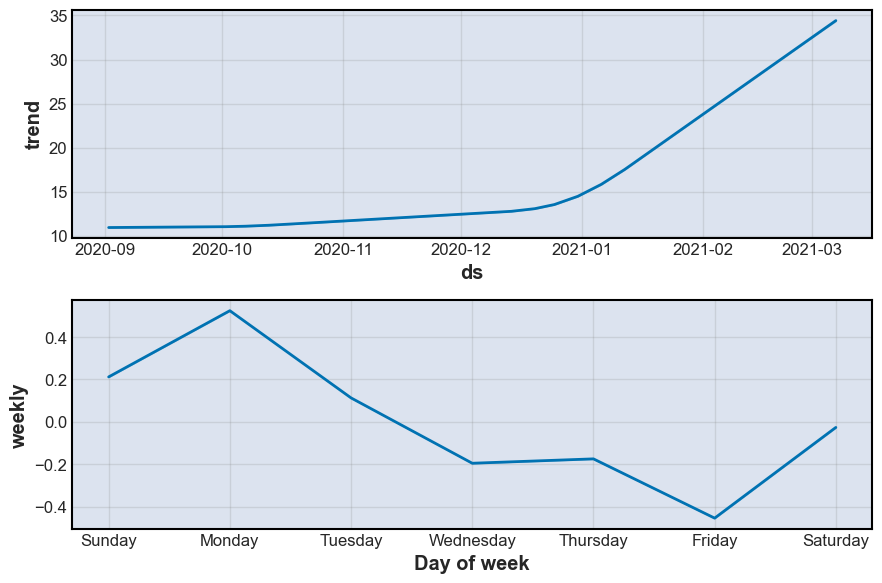

In [10]:
m.plot_components(forecast)